In [ ]:
import sympy as sp
import numpy as np
import pandas as pd

# Bloc 1

**Simulation d'une chaîne de Markov**


Une présentation détaillée de ce bloc se retrouve dans le fichier Latex.

Lors de mon cours d'algèbre linéaire et géométrie vectorielle, j'ai appris les **Chaînes de Markov**. Les chaînes de Markov sont un modèle qui fait les suppositions suivantes:

"La probabilité de passer d'un état à un autre dépend de l'état où vous êtes maintenant, et pas du passé"

Par exemple, admettons qu'**aujourd'hui est une journée ensoleillée**. "**Aujourd'hui ensoleillé**" est la seule chose qu'on a besoin de savoir pour obtenir la probabilité que "**demain sera ensoleillé**" (il importe peu que hier était ensoleillé ou non).

Le concept peut est simple, mais les résultats peuvent être très intéressants. Particulièrement, ça devient quand on considère une séquence de variables aléatoires. Dans ce cas, on peut créer un processus et observer l'évolution complète basée sur les suppositions.

Chaîne de Markov - Dettes

In [ ]:
#Matrice de transition A
A = sp.Matrix([[2/3, 1/3],[1/6, 5/6]])
A.transpose()

Matrix([
[0.666666666666667, 0.166666666666667],
[0.333333333333333, 0.833333333333333]])

In [ ]:
#Vecteur d'état initial du système
S0 = sp.Matrix([[1,0]])
S0.transpose()

Matrix([
[1],
[0]])

In [ ]:
#Après un jour
S1 = S0 * A
S1.transpose()

Matrix([
[0.333333969116211],
[0.666666030883789]])

In [ ]:
#Après deux jours
S0 * (A**2)

Matrix([[0.333333651224772, 0.666666348775228]])

In [ ]:
#Après un an
S0 * (A**365)

Matrix([[0.333333333333335, 0.66666666666667]])

In [ ]:
liste_approx = [S0]
for rang in range (1, 20, 1):
  S0 = S0 * A
  liste_approx.append(S0)

liste_approx

[Matrix([[1, 0]]),
 Matrix([[0.666666666666667, 0.333333333333333]]),
 Matrix([[0.5, 0.5]]),
 Matrix([[0.416666666666667, 0.583333333333333]]),
 Matrix([[0.375, 0.625]]),
 Matrix([[0.354166666666667, 0.645833333333333]]),
 Matrix([[0.34375, 0.65625]]),
 Matrix([[0.338541666666667, 0.661458333333333]]),
 Matrix([[0.3359375, 0.6640625]]),
 Matrix([[0.334635416666667, 0.665364583333333]]),
 Matrix([[0.333984375, 0.666015625]]),
 Matrix([[0.333658854166667, 0.666341145833333]]),
 Matrix([[0.33349609375, 0.66650390625]]),
 Matrix([[0.333414713541667, 0.666585286458333]]),
 Matrix([[0.3333740234375, 0.6666259765625]]),
 Matrix([[0.333353678385417, 0.666646321614583]]),
 Matrix([[0.333343505859375, 0.666656494140625]]),
 Matrix([[0.333338419596354, 0.666661580403646]]),
 Matrix([[0.333335876464844, 0.666664123535156]]),
 Matrix([[0.333334604899089, 0.666665395100912]])]

In [ ]:
liste_approx.append(100)
liste_approx

[Matrix([[1, 0]]),
 Matrix([[0.666666666666667, 0.333333333333333]]),
 Matrix([[0.5, 0.5]]),
 Matrix([[0.416666666666667, 0.583333333333333]]),
 Matrix([[0.375, 0.625]]),
 Matrix([[0.354166666666667, 0.645833333333333]]),
 Matrix([[0.34375, 0.65625]]),
 Matrix([[0.338541666666667, 0.661458333333333]]),
 Matrix([[0.3359375, 0.6640625]]),
 Matrix([[0.334635416666667, 0.665364583333333]]),
 Matrix([[0.333984375, 0.666015625]]),
 Matrix([[0.333658854166667, 0.666341145833333]]),
 Matrix([[0.33349609375, 0.66650390625]]),
 Matrix([[0.333414713541667, 0.666585286458333]]),
 Matrix([[0.3333740234375, 0.6666259765625]]),
 Matrix([[0.333353678385417, 0.666646321614583]]),
 Matrix([[0.333343505859375, 0.666656494140625]]),
 Matrix([[0.333338419596354, 0.666661580403646]]),
 Matrix([[0.333335876464844, 0.666664123535156]]),
 Matrix([[0.333334604899089, 0.666665395100912]]),
 Matrix([[0.333333969116211, 0.666666030883789]]),
 12,
 12,
 100]

In [ ]:
État = ['Sans dettes','Avec dettes']
trans_matrix = np.array([[2/3,1/6],[1/3,5/6]])
pd.DataFrame(trans_matrix,columns=État,index=État)

,Sans dettes,Avec dettes
Sans dettes,0.666667,0.166667
Avec dettes,0.333333,0.833333


In [ ]:
#Valeurs propres
A.eigenvals()

{0.500000000000000: 1, 1.00000000000000: 1}

In [ ]:
#Vecteurs propres
V = A.eigenvects()
V

[(0.500000000000000, 1, [Matrix([
   [-0.894427190999916],
   [ 0.447213595499958]])]), (1.00000000000000, 1, [Matrix([
   [-0.74535599249993],
   [-0.74535599249993]])])]

Chaîne de Markov - Équipe de hockey

In [ ]:

#Matrice de transition B
B = sp.Matrix([[0, 1/2, 1/4],[1/3, 0, 3/4],[2/3, 1/2, 0]])
B.transpose()

Matrix([
[   0, 0.333333333333333, 0.666666666666667],
[ 0.5,                 0,               0.5],
[0.25,              0.75,                 0]])

In [ ]:
#Vecteur d'état initial du système
P0 = sp.Matrix([[0, 1, 0]])
P0

Matrix([[0, 1, 0]])

In [ ]:
P0 * B.transpose()

Matrix([[0.5, 0, 0.5]])

In [ ]:
#Après 3 passes
P0 * (B**3)

Matrix([[0.236111111111111, 0.291666666666667, 0.53125]])

In [ ]:
#Après 100 passes
P0 * (B.transpose()**100)

Matrix([[0.272727272727272, 0.363636363636363, 0.363636363636363]])

In [ ]:
#Liste des valeurs après 23 passes
liste_approx2 = [P0]
for rang in range (1, 23, 1):
  P0 = P0 * B
  liste_approx2.append(P0)
 
liste_approx2

[Matrix([[0, 1, 0]]),
 Matrix([[0.333333333333333, 0, 0.75]]),
 Matrix([[0.5, 0.541666666666667, 0.0833333333333333]]),
 Matrix([[0.236111111111111, 0.291666666666667, 0.53125]]),
 Matrix([[0.451388888888889, 0.383680555555556, 0.277777777777778]]),
 Matrix([[0.313078703703704, 0.364583333333333, 0.400607638888889]]),
 Matrix([[0.388599537037037, 0.356843171296296, 0.351707175925926]]),
 Matrix([[0.353419174382716, 0.370153356481481, 0.364782262731481]]),
 Matrix([[0.366572627314815, 0.359100718557099, 0.36596981095679]]),
 Matrix([[0.363680113490226, 0.366271219135802, 0.360968695746528]]),
 Matrix([[0.362736203542953, 0.362324404618377, 0.365623442724408]]),
 Matrix([[0.364523763355731, 0.364179823133681, 0.362427354349521]]),
 Matrix([[0.363011510610907, 0.363475558852626, 0.364265808189193]]),
 Matrix([[0.364002391743671, 0.36363865940005, 0.363359546792196]]),
 Matrix([[0.363452584328148, 0.363680969267934, 0.363729592485955]]),
 Matrix([[0.363713384746615, 0.363591088407052, 0.36

In [ ]:
#Valeurs propres
B.eigenvals()
B

Matrix([
[                0, 0.5, 0.25],
[0.333333333333333,   0, 0.75],
[0.666666666666667, 0.5,    0]])

In [ ]:
#Vecteurs propres
V = B.eigenvects()
V

[(1.0 + 5.77166966133489e-65*I, 1, [Matrix([
   [-0.368290763075254 + 0.289610270804401*I],
   [-0.491054350767005 + 0.386147027739202*I],
   [-0.491054350767005 + 0.386147027739202*I]])]),
 (-0.5 - 0.204124145231932*I, 1, [Matrix([
   [-0.420036623024325 + 0.354655519525107*I],
   [0.709611642123721 - 0.0116970529613174*I],
   [-0.289575019099396 - 0.342958466563789*I]])]),
 (-0.5 + 0.204124145231932*I, 1, [Matrix([
   [-0.635080638977534 + 0.130870651600854*I],
   [ 0.528225199401653 - 0.649411821939406*I],
   [ 0.106855439575881 + 0.518541170338552*I]])])]

### Vecteurs de la chaîne de Markov

Chaque chaîne de Markov doit avoir un vecteur initial. Il permet d'indiquer quelle sera la distribution de l'état initial. Je vais appeler ce vecteur $V_e$. "e" représente l'état, puisque c'est un vecteur d'état initial.

$V_{init}=(v_1\  \ v_2\ \ v_3)$

In [ ]:
v_init = np.array([0.1, 0.8, 0.1])

D'après le vecteur d'état initial, 
- 10% commencent à l'état 1
- 80% commencent à l'état 2
- 10% commencent à l'état 3


\

Pour savoir comment se font les transitions entre les états, on peut utiliser une **matrice de transition**. Elle donne les probabilités de passer d'un état à l'autre.

J'appelle la matrice de transition $V_{transition}$.

Le terme transition n'est pas utilisé pour indiquer un temps, mais pour indiquer un changement d'état


In [ ]:
v_transition = np.array(
    [[0.6, 0.2, 0.2],
     [0.05, 0.9, 0.05],
     [0.1, 0.2, 0.7]]
)
v_transition

array([[0.6 , 0.2 , 0.2 ],
       [0.05, 0.9 , 0.05],
       [0.1 , 0.2 , 0.7 ]])

J'utilise la fonction suivante pour vérifier que la somme de chaque rangé est 1. S'il y a une erreur, c'est que la somme n'est pas 1.

In [ ]:
assert v_transition[0, :].sum() == 1
assert v_transition[1, :].sum() == 1
assert v_transition[2, :].sum() == 1

Pour faire une simulation de la distribution dans le prochain état, je multiplie la matrice initiale par la matrice de transition.

In [ ]:
v_proch = v_init @ v_transition
v_proch

array([0.11, 0.76, 0.13])

Je peux le refaire, pour simuler la distribution de l'état juste après.

In [ ]:
v_proch = v_proch @ v_transition
v_proch

array([0.117, 0.732, 0.151])

Je vais faire une boucle-for du processus 

In [ ]:
v_etat_t = [v_init]

for i in range(244):  # 244 états :)
    v_etat_t.append(v_etat_t[-1] @ v_transition)

Pour aider à comprendre ce qui a été générer, je mets la liste v_etat_t dans une trame de donnée pandas. C'est la raison pourquoi le module a été importé.

In [ ]:
distributions_etat = pd.DataFrame(v_etat_t)
distributions_etat

,0,1,2
0,0.100000,0.800000,0.10000
1,0.110000,0.760000,0.13000
2,0.117000,0.732000,0.15100
3,0.121900,0.712400,0.16570
4,0.125330,0.698680,0.17599
...,...,...,...
240,0.133333,0.666667,0.20000
241,0.133333,0.666667,0.20000
242,0.133333,0.666667,0.20000
243,0.133333,0.666667,0.20000


J'insère un graphique pour voir à quoi ressemble la distribution.

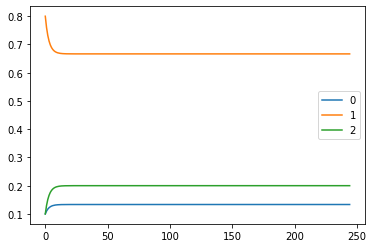

In [ ]:
distributions_etat.plot();